In [141]:
#https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
import pandas as pd
import numpy as np
import os
from datetime import datetime

#!pip install pypyodbc
#!pip install pyodbc

import pypyodbc
import pyodbc

import statsmodels.api as sm #Modelos estadistico y metodologías econometricas
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller #Pruebas de raíz unitaria ads,kpss,ers
from statsmodels.tsa.seasonal import seasonal_decompose #Análisis de estacionalidad

import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts

import sklearn as sk
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats.distributions import chi2
import seaborn as sns

import warnings
import itertools
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
sql_queryx = pd.read_excel (r"G:\.shortcut-targets-by-id\1CvCex95agcRH6L6KPy5QTdP2_XJoAUNX\02. Investment (I)\7. Reportes\1. Bases\Ledger\Series.xlsx")
pd.options.display.float_format = '{:,.0f}'.format
sql_queryx['Infra'] = sql_queryx['Infra'].cumsum().shift(-4)
sql_queryx['Maq'] = sql_queryx['Maq'].cumsum().shift(-4)
sql_queryx.dropna(subset = ['Infra'], inplace=True)
#sql_queryx

In [56]:
sql_queryx

,Date,Infra,Mant_inf,Maq,Mant_maq
0,2006-01-01,"14,260,259","853,358","13,003,022","310,879"
1,2006-04-01,"18,314,898","1,002,948","16,236,055","353,656"
2,2006-07-01,"30,645,035","866,918","17,784,030","289,959"
3,2006-10-01,"46,176,552","992,432","26,606,342","596,242"
4,2007-01-01,"59,136,281","1,236,404","30,755,192","353,384"
5,2007-04-01,"75,554,179","511,212","32,753,694","225,679"
6,2007-07-01,"98,514,154","1,565,065","37,336,905","315,152"
7,2007-10-01,"145,941,155","1,363,417","49,843,272","495,921"
8,2008-01-01,"153,031,908","1,424,070","53,850,529","303,930"
9,2008-04-01,"155,621,453","1,124,787","56,307,279","288,487"


### Mantenimiento e Inversión en Infraestructura - Modelo OLS

In [3]:
X = sql_queryx['Infra']
y = sql_queryx['Mant_inf']
# X = sm.add_constant(X)
result1 = sm.OLS(y, X.astype(float)).fit()
print(result1.summary())

                                 OLS Regression Results                                
Dep. Variable:               Mant_inf   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.807
Method:                 Least Squares   F-statistic:                              243.8
Date:                Thu, 15 Jul 2021   Prob (F-statistic):                    3.01e-22
Time:                        12:06:31   Log-Likelihood:                         -906.50
No. Observations:                  58   AIC:                                      1815.
Df Residuals:                      57   BIC:                                      1817.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

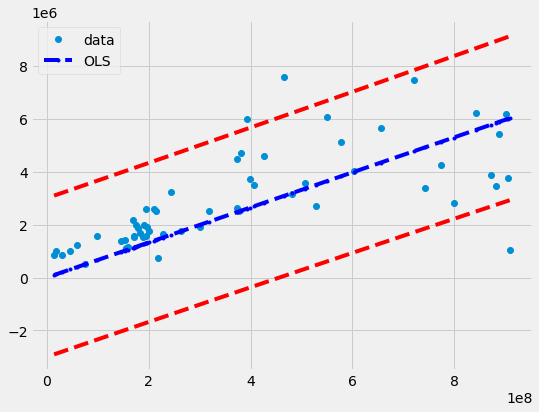

In [4]:
prstd, iv_l, iv_u = wls_prediction_std(result1)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, y, 'o', label="data")
#ax.plot(X, result1.predict(), 'y-', label="Predict")
ax.plot(X, result1.fittedvalues, 'b--.', label="OLS")
ax.plot(X, iv_u, 'r--')
ax.plot(X, iv_l, 'r--')
ax.legend(loc='best');

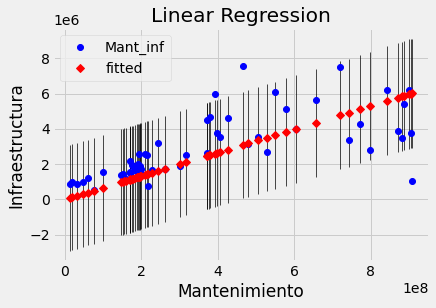

In [5]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(result1, 0, ax=ax)
ax.set_ylabel("Infraestructura")
ax.set_xlabel("Mantenimiento")
ax.set_title("Linear Regression")
plt.show()

### Mantenimiento e Inversión en Infraestructura - Modelo SARIMAX

##### Estimación en Niveles

In [6]:
model = sm.tsa.statespace.SARIMAX(endog=y, exog =X, order=(0,0,4))
result2 = model.fit()
print(result2.summary());

                               SARIMAX Results                                
Dep. Variable:               Mant_inf   No. Observations:                   58
Model:               SARIMAX(0, 0, 4)   Log Likelihood                -897.446
Date:                Thu, 15 Jul 2021   AIC                           1806.892
Time:                        12:06:32   BIC                           1819.255
Sample:                             0   HQIC                          1811.708
                                 - 58                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Infra          0.0062      0.001      5.983      0.000       0.004       0.008
ma.L1          0.2298      0.194      1.185      0.236      -0.150       0.610
ma.L2          0.3818      0.183      2.083      0.0

##### Estimación en Tasas de Crecimiento

In [101]:
X = sql_queryx['Infra']

result = sts.adfuller(X)
print('Null Hypothesis(H0): Serie has a unit root')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Numbers of lag used         : %f' % result[2])
print('Numbers of observations used: %f' % result[3])
print('Criterio de Información     : %f' % result[5])

ADF=result[0]
Critical=result[4].get('10%')
if ADF<Critical:
    print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')
elif Critical<ADF:
    print('No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie tiene raíz unitaria, entonces es no estacionaria')
else: print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')

Null Hypothesis(H0): Serie has a unit root
ADF Statistic: 0.408745
p-value: 0.981819
Critical Values:
	1%: -3.555
	5%: -2.916
	10%: -2.596
Numbers of lag used         : 2.000000
Numbers of observations used: 55.000000
Criterio de Información     : 1644.405929
No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería 0.981819
Por tanto: La serie tiene raíz unitaria, entonces es no estacionaria


In [102]:
y = sql_queryx['Mant_inf']

result = sts.adfuller(y)
print('Null Hypothesis(H0): Serie has a unit root')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Numbers of lag used         : %f' % result[2])
print('Numbers of observations used: %f' % result[3])
print('Criterio de Información     : %f' % result[5])

ADF=result[0]
Critical=result[4].get('10%')
if ADF<Critical:
    print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')
elif Critical<ADF:
    print('No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie tiene raíz unitaria, entonces es no estacionaria')
else: print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')

Null Hypothesis(H0): Serie has a unit root
ADF Statistic: -1.329209
p-value: 0.615706
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599
Numbers of lag used         : 8.000000
Numbers of observations used: 49.000000
Criterio de Información     : 1406.224425
No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería 0.615706
Por tanto: La serie tiene raíz unitaria, entonces es no estacionaria


Ninguna de las series son estacionarias

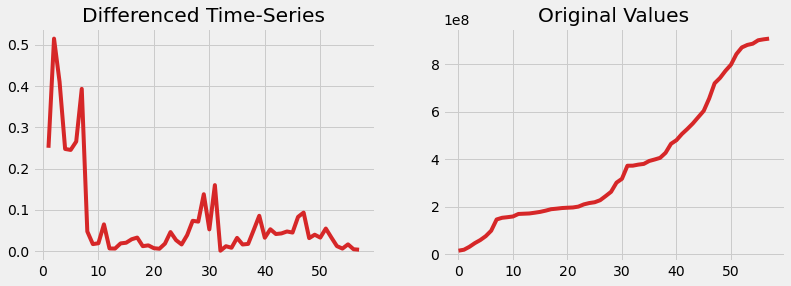

In [146]:

#df_logged_diff_x = sql_queryx['Infra'].pct_change()

df_logged_x = sql_queryx['Infra'].apply(lambda x : np.log(x))

df_logged_diff_x = df_logged_x - df_logged_x.shift()

ax1 = plt.subplot(121)
df_logged_diff_x.plot(figsize=(12,4), color="tab:red", title="Differenced Time-Series", ax=ax1)
ax2 = plt.subplot(122)
sql_queryx['Infra'].plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

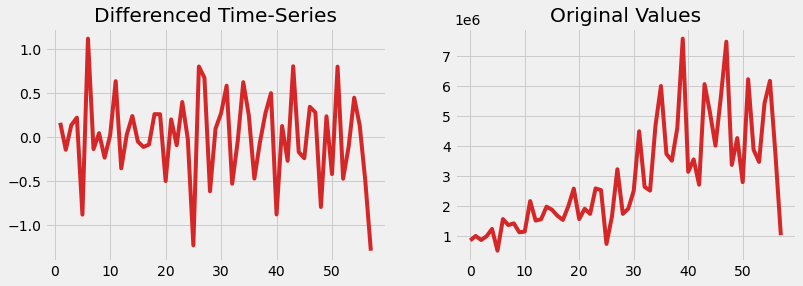

In [147]:
#df_logged_diff = sql_queryx['Mant_inf'].pct_change()

df_logged = sql_queryx['Mant_inf'].apply(lambda x : np.log(x))

df_logged_diff = df_logged - df_logged.shift()

ax1 = plt.subplot(121)
df_logged_diff.plot(figsize=(12,4), color="tab:red", title="Differenced Time-Series", ax=ax1)
ax2 = plt.subplot(122)
sql_queryx['Mant_inf'].plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [166]:
db1=pd.DataFrame(df_logged_diff)
db2 = pd.DataFrame(df_logged_diff_x)
db1 = db1.iloc[1:,]
db2 = db2.iloc[1:,]
db_new=pd.concat([db1,db2], axis=1)
#db_new

In [167]:
X = db_new['Infra']

result = sts.adfuller(X)
print('Null Hypothesis(H0): Serie has a unit root')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Numbers of lag used         : %f' % result[2])
print('Numbers of observations used: %f' % result[3])
print('Criterio de Información     : %f' % result[5])

ADF=result[0]
Critical=result[4].get('10%')
if ADF<Critical:
    print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')
elif Critical<ADF:
    print('No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie tiene raíz unitaria, entonces es no estacionaria')
else: print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria') 

Null Hypothesis(H0): Serie has a unit root
ADF Statistic: -4.375603
p-value: 0.000328
Critical Values:
	1%: -3.555
	5%: -2.916
	10%: -2.596
Numbers of lag used         : 1.000000
Numbers of observations used: 55.000000
Criterio de Información     : -182.268340
Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería 0.000328
Por tanto: La serie no tiene raíz unitaria, entonces es estacionaria


In [168]:
y = db_new['Mant_inf']

result = sts.adfuller(y)
print('Null Hypothesis(H0): Serie has a unit root')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Numbers of lag used         : %f' % result[2])
print('Numbers of observations used: %f' % result[3])
print('Criterio de Información     : %f' % result[5])

ADF=result[0]
Critical=result[4].get('10%')
if ADF<Critical:
    print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')
elif Critical<ADF:
    print('No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie tiene raíz unitaria, entonces es no estacionaria')
else: print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria') 

Null Hypothesis(H0): Serie has a unit root
ADF Statistic: -8.501464
p-value: 0.000000
Critical Values:
	1%: -3.558
	5%: -2.917
	10%: -2.596
Numbers of lag used         : 2.000000
Numbers of observations used: 54.000000
Criterio de Información     : 48.448793
Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería 0.000000
Por tanto: La serie no tiene raíz unitaria, entonces es estacionaria


In [71]:
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


In [15]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(db_new['Mant_inf'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 4)12 - AIC:82.43995223726623
ARIMA(0, 0, 0)x(0, 0, 1, 4)12 - AIC:76.54734491709495
ARIMA(0, 0, 0)x(0, 1, 0, 4)12 - AIC:92.7476591773287


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 0, 0)x(0, 1, 1, 4)12 - AIC:56.03930209254025
ARIMA(0, 0, 0)x(1, 0, 0, 4)12 - AIC:78.67289769026094
ARIMA(0, 0, 0)x(1, 0, 1, 4)12 - AIC:67.68612215107413


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 0, 0)x(1, 1, 0, 4)12 - AIC:60.03939910126535
ARIMA(0, 0, 0)x(1, 1, 1, 4)12 - AIC:56.53123674436081
ARIMA(0, 0, 1)x(0, 0, 0, 4)12 - AIC:66.42424823147125
ARIMA(0, 0, 1)x(0, 0, 1, 4)12 - AIC:56.80717425502308


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 0, 1)x(0, 1, 0, 4)12 - AIC:60.36316669821665
ARIMA(0, 0, 1)x(0, 1, 1, 4)12 - AIC:41.55722619082406
ARIMA(0, 0, 1)x(1, 0, 0, 4)12 - AIC:58.552249505082784
ARIMA(0, 0, 1)x(1, 0, 1, 4)12 - AIC:49.23956135440729


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 0, 1)x(1, 1, 0, 4)12 - AIC:46.438592059557784
ARIMA(0, 0, 1)x(1, 1, 1, 4)12 - AIC:42.532553563386706
ARIMA(0, 1, 0)x(0, 0, 0, 4)12 - AIC:131.84060515756673
ARIMA(0, 1, 0)x(0, 0, 1, 4)12 - AIC:118.61124901272059

C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages


ARIMA(0, 1, 0)x(0, 1, 0, 4)12 - AIC:145.92406943276245
ARIMA(0, 1, 0)x(0, 1, 1, 4)12 - AIC:102.52136195010277
ARIMA(0, 1, 0)x(1, 0, 0, 4)12 - AIC:126.40853398799536


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 1, 0)x(1, 0, 1, 4)12 - AIC:114.5002685888345
ARIMA(0, 1, 0)x(1, 1, 0, 4)12 - AIC:105.9915195342142
ARIMA(0, 1, 0)x(1, 1, 1, 4)12 - AIC:100.35600548640276
ARIMA(0, 1, 1)x(0, 0, 0, 4)12 - AIC:86.7083177731611


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 1, 1)x(0, 0, 1, 4)12 - AIC:77.38915358250313
ARIMA(0, 1, 1)x(0, 1, 0, 4)12 - AIC:90.89528270796153
ARIMA(0, 1, 1)x(0, 1, 1, 4)12 - AIC:59.99337992255634
ARIMA(0, 1, 1)x(1, 0, 0, 4)12 - AIC:84.19716283413014

C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages


ARIMA(0, 1, 1)x(1, 0, 1, 4)12 - AIC:70.50186472965547
ARIMA(0, 1, 1)x(1, 1, 0, 4)12 - AIC:65.44920168357204


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 1, 1)x(1, 1, 1, 4)12 - AIC:58.694303009936114
ARIMA(1, 0, 0)x(0, 0, 0, 4)12 - AIC:78.36989458253399
ARIMA(1, 0, 0)x(0, 0, 1, 4)12 - AIC:69.89915410450804
ARIMA(1, 0, 0)x(0, 1, 0, 4)12 - AIC:70.86544100387297


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 0, 0)x(0, 1, 1, 4)12 - AIC:41.848196586079446
ARIMA(1, 0, 0)x(1, 0, 0, 4)12 - AIC:63.08367913020396
ARIMA(1, 0, 0)x(1, 0, 1, 4)12 - AIC:48.96765485583603


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 0, 0)x(1, 1, 0, 4)12 - AIC:49.27018052545774
ARIMA(1, 0, 0)x(1, 1, 1, 4)12 - AIC:43.29561429319153
ARIMA(1, 0, 1)x(0, 0, 0, 4)12 - AIC:68.42078194194136


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 0, 1)x(0, 0, 1, 4)12 - AIC:58.80038565588667
ARIMA(1, 0, 1)x(0, 1, 0, 4)12 - AIC:62.30790914073024
ARIMA(1, 0, 1)x(0, 1, 1, 4)12 - AIC:41.75123245699271


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 0, 1)x(1, 0, 0, 4)12 - AIC:60.11542587924943


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


ARIMA(1, 0, 1)x(1, 0, 1, 4)12 - AIC:48.73535872346363
ARIMA(1, 0, 1)x(1, 1, 0, 4)12 - AIC:47.8627798253356


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


ARIMA(1, 0, 1)x(1, 1, 1, 4)12 - AIC:42.36534921828364
ARIMA(1, 1, 0)x(0, 0, 0, 4)12 - AIC:115.73184953867671
ARIMA(1, 1, 0)x(0, 0, 1, 4)12 - AIC:100.72753187050091
ARIMA(1, 1, 0)x(0, 1, 0, 4)12 - AIC:108.33732052083161
ARIMA(1, 1, 0)x(0, 1, 1, 4)12 - AIC:68.61324237499302


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 1, 0)x(1, 0, 0, 4)12 - AIC:95.1240857510389
ARIMA(1, 1, 0)x(1, 0, 1, 4)12 - AIC:82.30609061806909
ARIMA(1, 1, 0)x(1, 1, 0, 4)12 - AIC:79.36900213261987


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 1, 0)x(1, 1, 1, 4)12 - AIC:68.0440371460634
ARIMA(1, 1, 1)x(0, 0, 0, 4)12 - AIC:82.92026338847819
ARIMA(1, 1, 1)x(0, 0, 1, 4)12 - AIC:73.60804489624962
ARIMA(1, 1, 1)x(0, 1, 0, 4)12 - AIC:75.41735296142045


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 1, 1)x(0, 1, 1, 4)12 - AIC:46.77532181558838
ARIMA(1, 1, 1)x(1, 0, 0, 4)12 - AIC:68.92160594554272


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 1, 1)x(1, 0, 1, 4)12 - AIC:55.60757246132514
ARIMA(1, 1, 1)x(1, 1, 0, 4)12 - AIC:54.7144436840702
ARIMA(1, 1, 1)x(1, 1, 1, 4)12 - AIC:46.82249624523219


In [173]:
warnings.filterwarnings('ignore', message='foo bar')
model = sm.tsa.statespace.SARIMAX(endog=db_new.Mant_inf, exog =db_new.Infra, order=(0,0,1))
results = model.fit()
print(results.summary());

                               SARIMAX Results                                
Dep. Variable:               Mant_inf   No. Observations:                   57
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -29.781
Date:                Thu, 15 Jul 2021   AIC                             65.562
Time:                        14:55:51   BIC                             71.691
Sample:                             0   HQIC                            67.944
                                 - 57                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Infra          0.3045      0.167      1.823      0.068      -0.023       0.632
ma.L1         -0.7821      0.112     -7.004      0.000      -1.001      -0.563
sigma2         0.1637      0.021      7.733      0.0

C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


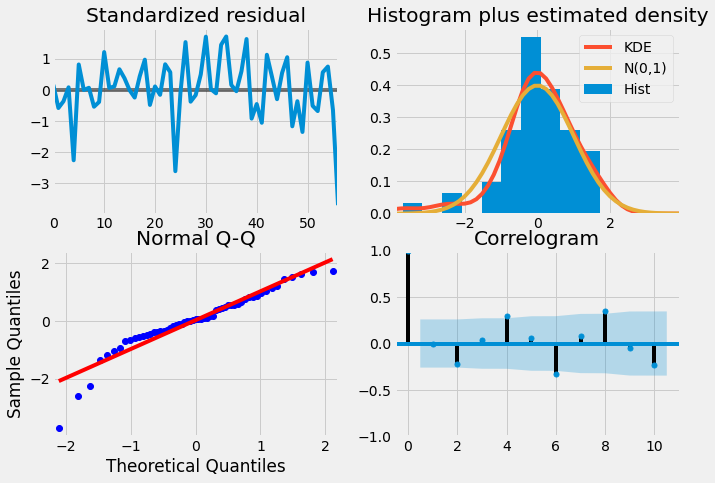

In [171]:
results.plot_diagnostics(figsize=(10, 7))
plt.show()

In [172]:
pred = results.get_prediction(start=0,  dynamic=False)
pred_ci = pred.conf_int()
#pred_ci

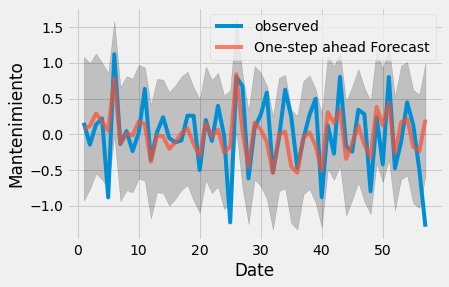

In [154]:
ax = db_new['Mant_inf'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Mantenimiento')
plt.legend()

plt.show()

In [155]:
db_new.Infra[0:8,]

1   0
2   1
3   0
4   0
5   0
6   0
7   0
8   0
Name: Infra, dtype: float64

In [174]:
pred_uc = results.get_forecast(steps=8, exog=db_new.Infra[0:8,])

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


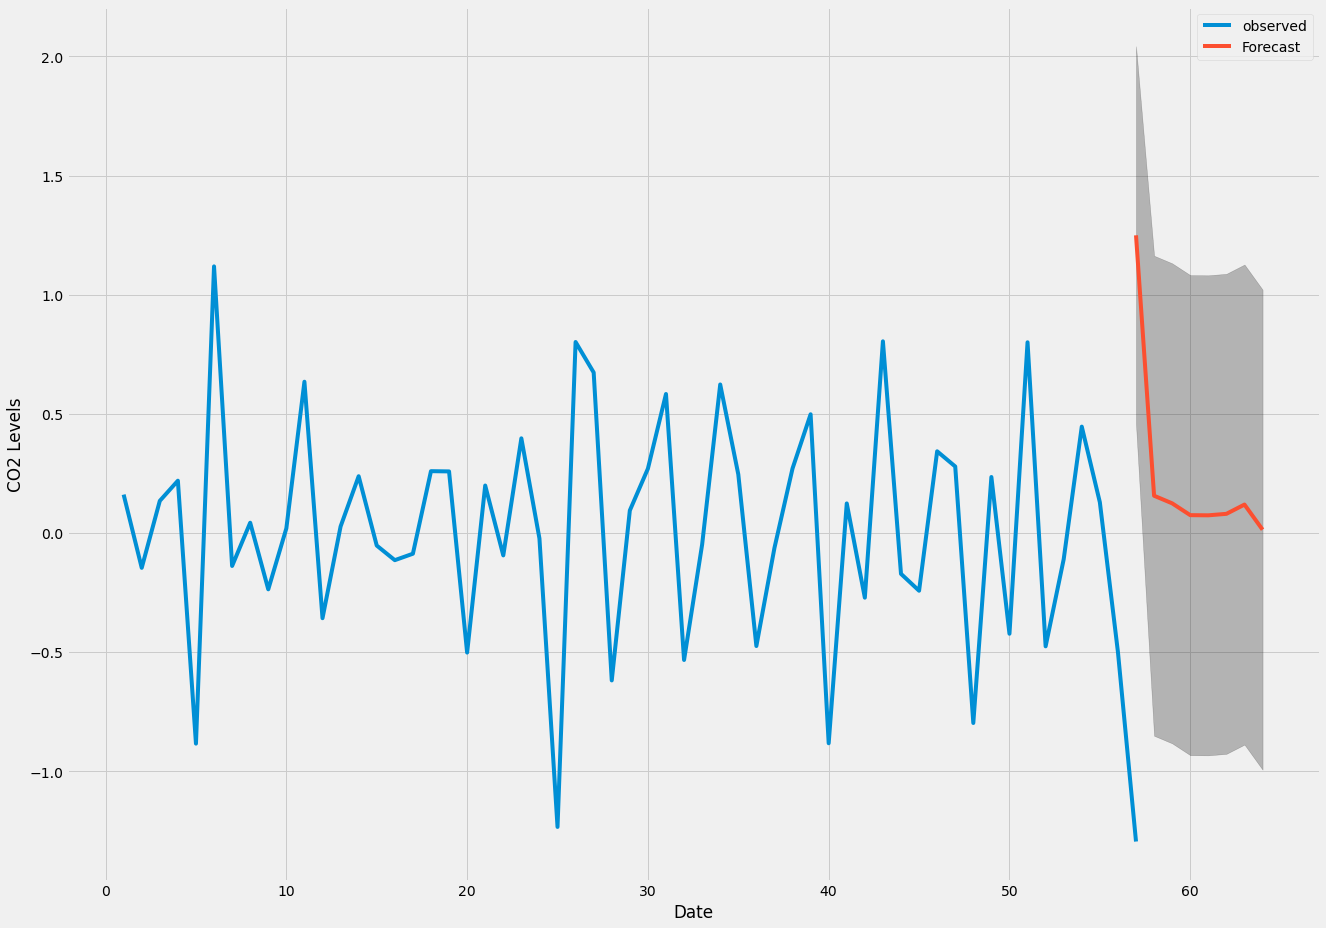

In [175]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [186]:
ti = pred.predicted_mean
db_n = pd.DataFrame(ti, columns = ['mant_rate_hat'])
db_n['FECHA'] = pd.date_range('2007-04-05', periods=57, freq='Q')
db_n['mant_rate'] = y
db_n['infra_rate'] = X
db_n['error'] = y - db_n['mant_rate_hat']
db_n['Mant_inf'] = sql_queryx['Mant_inf']
db_n['Infra'] = sql_queryx['Infra']
db_n

,mant_rate_hat,FECHA,mant_rate,infra_rate,error,Mant_inf,Infra
1,0,2007-06-30,0,0,0,"1,002,948","18,314,898"
2,0,2007-09-30,-0,1,-0,"866,918","30,645,035"
3,0,2007-12-31,0,0,-0,"992,432","46,176,552"
4,0,2008-03-31,0,0,0,"1,236,404","59,136,281"
5,0,2008-06-30,-1,0,-1,"511,212","75,554,179"
6,1,2008-09-30,1,0,0,"1,565,065","98,514,154"
7,-0,2008-12-31,-0,0,-0,"1,363,417","145,941,155"
8,0,2009-03-31,0,0,0,"1,424,070","153,031,908"
9,-0,2009-06-30,-0,0,-0,"1,124,787","155,621,453"
10,0,2009-09-30,0,0,-0,"1,147,370","158,585,359"


In [187]:
forecast= pred_uc.predicted_mean
db1 = pd.DataFrame(forecast, columns = ['mant_rate_hat'])
db1['FECHA']= pd.date_range('2021-07-01', periods=8, freq='Q')
db1

,mant_rate_hat,FECHA
57,1,2021-09-30
58,0,2021-12-31
59,0,2022-03-31
60,0,2022-06-30
61,0,2022-09-30
62,0,2022-12-31
63,0,2023-03-31
64,0,2023-06-30


In [188]:
mantenimiento_infra = pd.concat([db_n, db1], axis=0)
mantenimiento_infra

,mant_rate_hat,FECHA,mant_rate,infra_rate,error,Mant_inf,Infra
1,0,2007-06-30,0,0,0,"1,002,948","18,314,898"
2,0,2007-09-30,-0,1,-0,"866,918","30,645,035"
3,0,2007-12-31,0,0,-0,"992,432","46,176,552"
4,0,2008-03-31,0,0,0,"1,236,404","59,136,281"
5,0,2008-06-30,-1,0,-1,"511,212","75,554,179"
...,...,...,...,...,...,...,...
60,0,2022-06-30,nan,nan,nan,nan,nan
61,0,2022-09-30,nan,nan,nan,nan,nan
62,0,2022-12-31,nan,nan,nan,nan,nan
63,0,2023-03-31,nan,nan,nan,nan,nan


In [192]:
hola = mantenimiento_infra.copy()
hola['predi1'] = hola['Mant_inf'].shift()*np.exp(hola['mant_rate'])
hola['predi2'] = hola['predi1'].shift()*np.exp(hola['mant_rate_hat'])
hola['predi3']  = hola['predi2'].shift()*np.exp(hola['mant_rate_hat'])
hola['predi4']  = hola['predi3'].shift()*np.exp(hola['mant_rate_hat'])
hola['predi5']  = hola['predi4'].shift()*np.exp(hola['mant_rate_hat'])
hola['predi6']  = hola['predi5'].shift()*np.exp(hola['mant_rate_hat'])
hola['predi7']  = hola['predi6'].shift()*np.exp(hola['mant_rate_hat'])
hola['predi8']  = hola['predi7'].shift()*np.exp(hola['mant_rate_hat'])
hola['predi9']  = hola['predi8'].shift()*np.exp(hola['mant_rate_hat'])


from datetime import datetime
import datetime

hola['date2'] = datetime.datetime(2021, 9, 30)
hola['date3'] = datetime.datetime(2021, 12, 31)
hola['date4'] = datetime.datetime(2022, 3, 31)
hola['date5'] = datetime.datetime(2022, 6, 30)
hola['date6'] = datetime.datetime(2022, 9, 30)
hola['date7'] = datetime.datetime(2022, 12, 31)
hola['date8'] = datetime.datetime(2023, 3, 31)
hola['date9'] = datetime.datetime(2023, 6, 30)

def fecha(row):
    if row['FECHA'] == row['date2']:
        clasifico = row['predi2']
    elif row['FECHA'] == row['date3']:
        clasifico = row['predi3']
    elif row['FECHA'] == row['date4']:
        clasifico = row['predi4']
    elif row['FECHA'] == row['date5']:
        clasifico = row['predi5']
    elif row['FECHA'] == row['date6']:
        clasifico = row['predi6']
    elif row['FECHA'] == row['date7']:
        clasifico = row['predi7']
    elif row['FECHA'] == row['date8']:
        clasifico = row['predi8']
    elif row['FECHA'] == row['date9']:
        clasifico = row['predi9']
    elif row['Mant_inf'] != 0 and row['Mant_inf'] != 'nan':
        clasifico = row['Mant_inf']
    else:
        clasifico = 'no'
    return clasifico

hola['mant_level_hat'] = hola.apply(fecha, axis=1)

infraestructura = hola[['FECHA','Mant_inf','Infra','mant_rate','mant_rate_hat','infra_rate','error','mant_level_hat']]
infraestructura

,FECHA,Mant_inf,Infra,mant_rate,mant_rate_hat,infra_rate,error,mant_level_hat
1,2007-06-30,"1,002,948","18,314,898",0,0,0,0,"1,002,948"
2,2007-09-30,"866,918","30,645,035",-0,0,1,-0,"866,918"
3,2007-12-31,"992,432","46,176,552",0,0,0,-0,"992,432"
4,2008-03-31,"1,236,404","59,136,281",0,0,0,0,"1,236,404"
5,2008-06-30,"511,212","75,554,179",-1,0,0,-1,"511,212"
...,...,...,...,...,...,...,...,...
60,2022-06-30,nan,nan,nan,0,nan,nan,"5,121,777"
61,2022-09-30,nan,nan,nan,0,nan,nan,"5,518,525"
62,2022-12-31,nan,nan,nan,0,nan,nan,"5,982,958"
63,2023-03-31,nan,nan,nan,0,nan,nan,"6,743,590"


In [190]:
infraestructura.to_csv(r'G:\.shortcut-targets-by-id\1CvCex95agcRH6L6KPy5QTdP2_XJoAUNX\02. Investment (I)\7. Reportes\3. Consultas\Analitico\Inversiones\Gino\Pruebas\Infraestructura_resultados.csv', sep=';', encoding='iso-8859-1',index=False)

### Mantenimiento e Inversión en Equipos - Modelo OLS

In [22]:
X = sql_queryx['Maq']
y = sql_queryx['Mant_maq']
# X = sm.add_constant(X)
res1 = sm.OLS(y, X.astype(float)).fit()
print(res1.summary())

                                 OLS Regression Results                                
Dep. Variable:               Mant_maq   R-squared (uncentered):                   0.821
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                              260.6
Date:                Thu, 15 Jul 2021   Prob (F-statistic):                    6.33e-23
Time:                        12:06:39   Log-Likelihood:                         -841.14
No. Observations:                  58   AIC:                                      1684.
Df Residuals:                      57   BIC:                                      1686.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

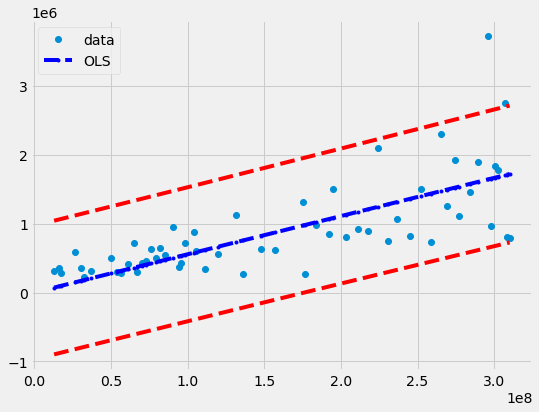

In [23]:
prstd, iv_l, iv_u = wls_prediction_std(res1)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, y, 'o', label="data")
#ax.plot(X, result1.predict(), 'y-', label="Predict")
ax.plot(X, res1.fittedvalues, 'b--.', label="OLS")
ax.plot(X, iv_u, 'r--')
ax.plot(X, iv_l, 'r--')
ax.legend(loc='best');

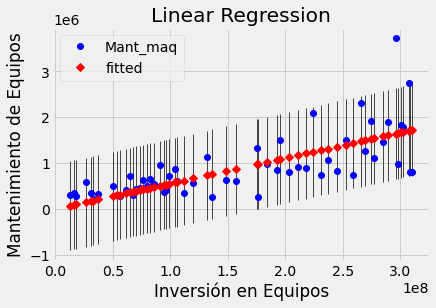

In [24]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(res1, 0, ax=ax)
ax.set_ylabel("Mantenimiento de Equipos")
ax.set_xlabel("Inversión en Equipos")
ax.set_title("Linear Regression")
plt.show()

### Mantenimiento e Inversión en Equipo - Modelo SARIMAX

##### Estimación en Niveles

In [25]:
model = sm.tsa.statespace.SARIMAX(endog=y, exog =X, order=(0,0,4))
res3 = model.fit()
print(res3.summary());

                               SARIMAX Results                                
Dep. Variable:               Mant_maq   No. Observations:                   58
Model:               SARIMAX(0, 0, 4)   Log Likelihood                -836.005
Date:                Thu, 15 Jul 2021   AIC                           1684.010
Time:                        12:06:39   BIC                           1696.373
Sample:                             0   HQIC                          1688.826
                                 - 58                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Maq            0.0055      0.001      9.503      0.000       0.004       0.007
ma.L1         -0.1177      0.291     -0.405      0.686      -0.687       0.452
ma.L2         -0.0731      0.231     -0.316      0.7

##### Estimación en Tasa de Crecimiento

In [26]:
X = sql_queryx['Maq']

result = sts.adfuller(X)
print('Null Hypothesis(H0): Serie has a unit root')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Numbers of lag used         : %f' % result[2])
print('Numbers of observations used: %f' % result[3])
print('Criterio de Información     : %f' % result[5])

ADF=result[0]
Critical=result[4].get('10%')
if ADF<Critical:
    print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')
elif Critical<ADF:
    print('No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie tiene raíz unitaria, entonces es no estacionaria')
else: print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria') 

Null Hypothesis(H0): Serie has a unit root
ADF Statistic: -0.420826
p-value: 0.906563
Critical Values:
	1%: -3.555
	5%: -2.916
	10%: -2.596
Numbers of lag used         : 2.000000
Numbers of observations used: 55.000000
Criterio de Información     : 1509.683500
No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería 0.906563
Por tanto: La serie tiene raíz unitaria, entonces es no estacionaria


In [27]:
y = sql_queryx['Mant_maq']

result = sts.adfuller(y)
print('Null Hypothesis(H0): Serie has a unit root')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Numbers of lag used         : %f' % result[2])
print('Numbers of observations used: %f' % result[3])
print('Criterio de Información     : %f' % result[5])

ADF=result[0]
Critical=result[4].get('10%')
if ADF<Critical:
    print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')
elif Critical<ADF:
    print('No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie tiene raíz unitaria, entonces es no estacionaria')
else: print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria') 


Null Hypothesis(H0): Serie has a unit root
ADF Statistic: -0.221188
p-value: 0.935948
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Numbers of lag used         : 11.000000
Numbers of observations used: 46.000000
Criterio de Información     : 1332.882704
No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería 0.935948
Por tanto: La serie tiene raíz unitaria, entonces es no estacionaria


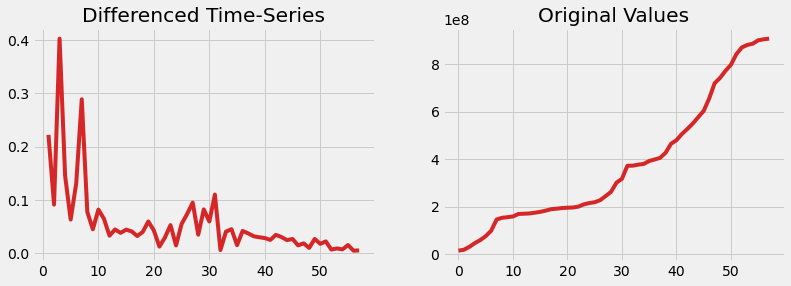

In [28]:
df_logged_x = sql_queryx['Maq'].apply(lambda x : np.log(x))

df_logged_diff_x = df_logged_x - df_logged_x.shift()

ax1 = plt.subplot(121)
df_logged_diff_x.plot(figsize=(12,4), color="tab:red", title="Differenced Time-Series", ax=ax1)
ax2 = plt.subplot(122)
sql_queryx['Infra'].plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

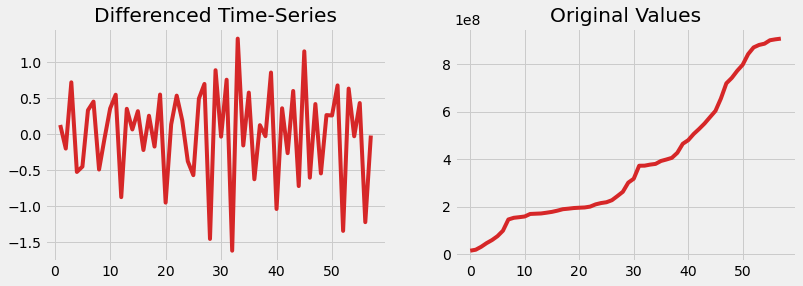

In [29]:
df_logged = sql_queryx['Mant_maq'].apply(lambda x : np.log(x))

df_logged_diff = df_logged- df_logged.shift()

ax1 = plt.subplot(121)
df_logged_diff.plot(figsize=(12,4), color="tab:red", title="Differenced Time-Series", ax=ax1)
ax2 = plt.subplot(122)
sql_queryx['Infra'].plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [30]:
df1=pd.DataFrame(df_logged_diff)
df2 = pd.DataFrame(df_logged_diff_x)
df1 = df1.iloc[1:,]
df2 = df2.iloc[1:,]
db_new1=pd.concat([df1,df2], axis=1)
#db_new1

In [31]:
# ADF Test
X = db_new1['Maq']

result = sts.adfuller(X)
print('Null Hypothesis(H0): Serie has a unit root')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Numbers of lag used         : %f' % result[2])
print('Numbers of observations used: %f' % result[3])
print('Criterio de Información     : %f' % result[5])

ADF=result[0]
Critical=result[4].get('10%')
if ADF<Critical:
    print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')
elif Critical<ADF:
    print('No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie tiene raíz unitaria, entonces es no estacionaria')
else: print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria') 

Null Hypothesis(H0): Serie has a unit root
ADF Statistic: -4.683423
p-value: 0.000090
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597
Numbers of lag used         : 3.000000
Numbers of observations used: 53.000000
Criterio de Información     : -220.050351
Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería 0.000090
Por tanto: La serie no tiene raíz unitaria, entonces es estacionaria


In [32]:
# ADF Test
y = db_new1['Mant_maq']

result = sts.adfuller(y)
print('Null Hypothesis(H0): Serie has a unit root')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Numbers of lag used         : %f' % result[2])
print('Numbers of observations used: %f' % result[3])
print('Criterio de Información     : %f' % result[5])

ADF=result[0]
Critical=result[4].get('10%')
if ADF<Critical:
    print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')
elif Critical<ADF:
    print('No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie tiene raíz unitaria, entonces es no estacionaria')
else: print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria') 

Null Hypothesis(H0): Serie has a unit root
ADF Statistic: -13.257369
p-value: 0.000000
Critical Values:
	1%: -3.558
	5%: -2.917
	10%: -2.596
Numbers of lag used         : 2.000000
Numbers of observations used: 54.000000
Criterio de Información     : 45.490921
Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería 0.000000
Por tanto: La serie no tiene raíz unitaria, entonces es estacionaria


In [33]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(db_new1['Mant_maq'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 4)12 - AIC:113.56474140258837
ARIMA(0, 0, 0)x(0, 0, 1, 4)12 - AIC:88.66204516756946
ARIMA(0, 0, 0)x(0, 1, 0, 4)12 - AIC:82.55968121804622


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 0, 0)x(0, 1, 1, 4)12 - AIC:59.51052855616249
ARIMA(0, 0, 0)x(1, 0, 0, 4)12 - AIC:77.96111062921962
ARIMA(0, 0, 0)x(1, 0, 1, 4)12 - AIC:65.11139565063559
ARIMA(0, 0, 0)x(1, 1, 0, 4)12 - AIC:72.24849505277528
ARIMA(0, 0, 0)x(1, 1, 1, 4)12 - AIC:62.79112053004495

C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages


ARIMA(0, 0, 1)x(0, 0, 0, 4)12 - AIC:79.73687646135222
ARIMA(0, 0, 1)x(0, 0, 1, 4)12 - AIC:58.83305154256775
ARIMA(0, 0, 1)x(0, 1, 0, 4)12 - AIC:51.50657103634878


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 0, 1)x(0, 1, 1, 4)12 - AIC:38.259841747760746
ARIMA(0, 0, 1)x(1, 0, 0, 4)12 - AIC:49.80363807029511
ARIMA(0, 0, 1)x(1, 0, 1, 4)12 - AIC:43.06131193336585


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 0, 1)x(1, 1, 0, 4)12 - AIC:47.923024938744575


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


ARIMA(0, 0, 1)x(1, 1, 1, 4)12 - AIC:40.259841561119174
ARIMA(0, 1, 0)x(0, 0, 0, 4)12 - AIC:176.2113928061182
ARIMA(0, 1, 0)x(0, 0, 1, 4)12 - AIC:145.61644191780968
ARIMA(0, 1, 0)x(0, 1, 0, 4)12 - AIC:138.61717557070065
ARIMA(0, 1, 0)x(0, 1, 1, 4)12 - AIC:110.05868510491726


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 1, 0)x(1, 0, 0, 4)12 - AIC:135.8907945409206
ARIMA(0, 1, 0)x(1, 0, 1, 4)12 - AIC:118.3542336648666
ARIMA(0, 1, 0)x(1, 1, 0, 4)12 - AIC:124.71747977029838
ARIMA(0, 1, 0)x(1, 1, 1, 4)12 - AIC:113.13466383563593
ARIMA(0, 1, 1)x(0, 0, 0, 4)12 - AIC:115.89117364974007


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 1, 1)x(0, 0, 1, 4)12 - AIC:91.4604730616314
ARIMA(0, 1, 1)x(0, 1, 0, 4)12 - AIC:85.09350289113826
ARIMA(0, 1, 1)x(0, 1, 1, 4)12 - AIC:65.38589050167371
ARIMA(0, 1, 1)x(1, 0, 0, 4)12 - AIC:83.5131518829024


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 1, 1)x(1, 0, 1, 4)12 - AIC:71.09655686640315
ARIMA(0, 1, 1)x(1, 1, 0, 4)12 - AIC:77.70263083026205


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 1, 1)x(1, 1, 1, 4)12 - AIC:69.12242109656489
ARIMA(1, 0, 0)x(0, 0, 0, 4)12 - AIC:91.37523808791161
ARIMA(1, 0, 0)x(0, 0, 1, 4)12 - AIC:69.22858525448063
ARIMA(1, 0, 0)x(0, 1, 0, 4)12 - AIC:64.53778674765547
ARIMA(1, 0, 0)x(0, 1, 1, 4)12 - AIC:46.624281887254924
ARIMA(1, 0, 0)x(1, 0, 0, 4)12 - AIC:58.17600122673089
ARIMA(1, 0, 0)x(1, 0, 1, 4)12 - AIC:50.962304914834256


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 0, 0)x(1, 1, 0, 4)12 - AIC:58.26255127193731
ARIMA(1, 0, 0)x(1, 1, 1, 4)12 - AIC:46.31237442614001
ARIMA(1, 0, 1)x(0, 0, 0, 4)12 - AIC:78.14333168712766


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 0, 1)x(0, 0, 1, 4)12 - AIC:58.87277336935858
ARIMA(1, 0, 1)x(0, 1, 0, 4)12 - AIC:53.45718181398698
ARIMA(1, 0, 1)x(0, 1, 1, 4)12 - AIC:39.923717969466445


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 0, 1)x(1, 0, 0, 4)12 - AIC:50.935161406625596
ARIMA(1, 0, 1)x(1, 0, 1, 4)12 - AIC:44.519661541014585


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


ARIMA(1, 0, 1)x(1, 1, 0, 4)12 - AIC:49.28974522089308
ARIMA(1, 0, 1)x(1, 1, 1, 4)12 - AIC:41.52672071543837
ARIMA(1, 1, 0)x(0, 0, 0, 4)12 - AIC:131.9055945639559
ARIMA(1, 1, 0)x(0, 0, 1, 4)12 - AIC:108.65570721529653


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 1, 0)x(0, 1, 0, 4)12 - AIC:108.2653094383465
ARIMA(1, 1, 0)x(0, 1, 1, 4)12 - AIC:82.46752487426353
ARIMA(1, 1, 0)x(1, 0, 0, 4)12 - AIC:99.90039840488963
ARIMA(1, 1, 0)x(1, 0, 1, 4)12 - AIC:89.46303528770922


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 1, 0)x(1, 1, 0, 4)12 - AIC:96.46104463856527
ARIMA(1, 1, 0)x(1, 1, 1, 4)12 - AIC:81.42404355549544
ARIMA(1, 1, 1)x(0, 0, 0, 4)12 - AIC:94.51028093503685


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 1, 1)x(0, 0, 1, 4)12 - AIC:72.23059770389223
ARIMA(1, 1, 1)x(0, 1, 0, 4)12 - AIC:69.31987219333021
ARIMA(1, 1, 1)x(0, 1, 1, 4)12 - AIC:53.413545521825895
ARIMA(1, 1, 1)x(1, 0, 0, 4)12 - AIC:64.1101816144483


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 1, 1)x(1, 0, 1, 4)12 - AIC:58.54309840514544
ARIMA(1, 1, 1)x(1, 1, 0, 4)12 - AIC:63.93891637765984
ARIMA(1, 1, 1)x(1, 1, 1, 4)12 - AIC:53.32287488774235


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [34]:
model = sm.tsa.statespace.SARIMAX(endog=db_new1.Mant_maq, exog =db_new1.Maq, order=(0,0,1))
results2 = model.fit()
print(results2.summary());

C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:               Mant_maq   No. Observations:                   57
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -36.078
Date:                Thu, 15 Jul 2021   AIC                             78.156
Time:                        12:06:45   BIC                             84.285
Sample:                             0   HQIC                            80.538
                                 - 57                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Maq            0.4609      0.165      2.789      0.005       0.137       0.785
ma.L1         -0.8731      0.070    -12.451      0.000      -1.011      -0.736
sigma2         0.2025      0.042      4.863      0.0

C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


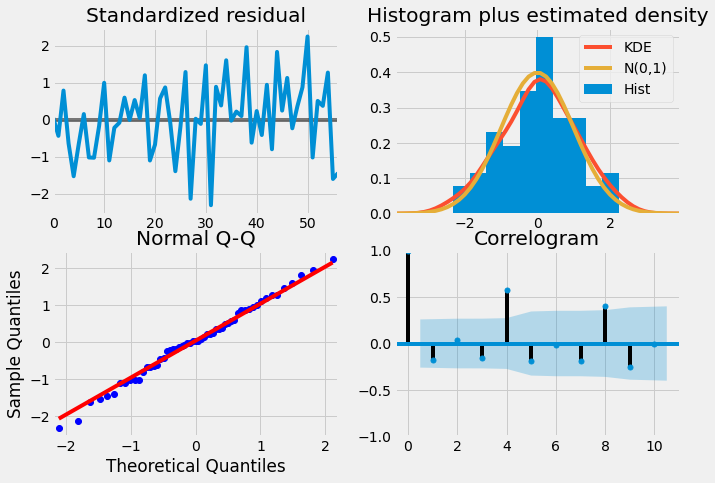

In [35]:
results2.plot_diagnostics(figsize=(10, 7))
plt.show()

In [36]:
pred = results2.get_prediction(start=0,  dynamic=False)
pred_ci = pred.conf_int()
#pred_ci


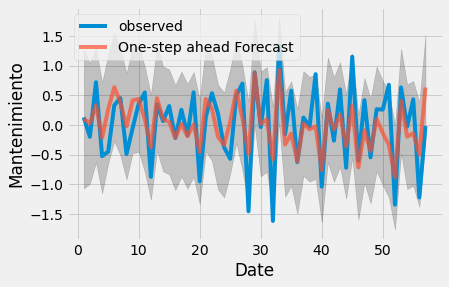

In [37]:
ax = db_new1['Mant_maq'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Mantenimiento')
plt.legend()

plt.show()

In [38]:
db_new1['mant_rate'] = db_new1['Mant_maq']
db_new1['mant_rate_hat']= pred.predicted_mean
db_new1['maq_rate'] = db_new1['Maq']
db_new1['error'] = db_new1['Mant_maq'] - db_new1['mant_rate_hat']
db_new1['Mant_maq'] = sql_queryx['Mant_maq']
db_new1['Maq'] = sql_queryx['Maq']
db_new1

,Mant_maq,Maq,mant_rate,mant_rate_hat,maq_rate,error
1,"353,656","16,236,055",0,0,0,0
2,"289,959","17,784,030",-0,0,0,-0
3,"596,242","26,606,342",1,0,0,0
4,"353,384","30,755,192",-1,-0,0,-0
5,"225,679","32,753,694",-0,0,0,-1
6,"315,152","37,336,905",0,1,0,-0
7,"495,921","49,843,272",0,0,0,0
8,"303,930","53,850,529",-0,-0,0,-0
9,"288,487","56,307,279",-0,0,0,-0
10,"412,802","61,101,558",0,0,0,-0


In [39]:
db_new1.to_csv(r'G:\.shortcut-targets-by-id\1CvCex95agcRH6L6KPy5QTdP2_XJoAUNX\02. Investment (I)\7. Reportes\3. Consultas\Analitico\Inversiones\Gino\Pruebas\Equipos_results.csv', sep=';', encoding='iso-8859-1')